#MyFirstSportsAnalysis

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There is 1 csv file in the current version of the dataset:


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/Fifa19.csv


In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


### Let's check 1st file: /kaggle/input/Fifa19.csv

In [6]:
#nRowsRead = 1000 # specify 'None' if want to read whole file
nRowsRead = None
# Fifa19.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/Fifa19.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Fifa19.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 16344 rows and 89 columns


Let's take a quick look at what the data looks like:

In [7]:
df1.head(5)

,Club,Playing_in_League,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,Real Madrid,Spain Primera Division (1),177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
1,Real Madrid,Spain Primera Division (1),155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
2,Real Madrid,Spain Primera Division (1),182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
3,Real Madrid,Spain Primera Division (1),192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
4,Real Madrid,Spain Primera Division (1),200145,Casemiro,26,https://cdn.sofifa.org/players/4/19/200145.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,90,...,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,€126.4M


Distribution graphs (histogram/bar graph) of sampled columns:

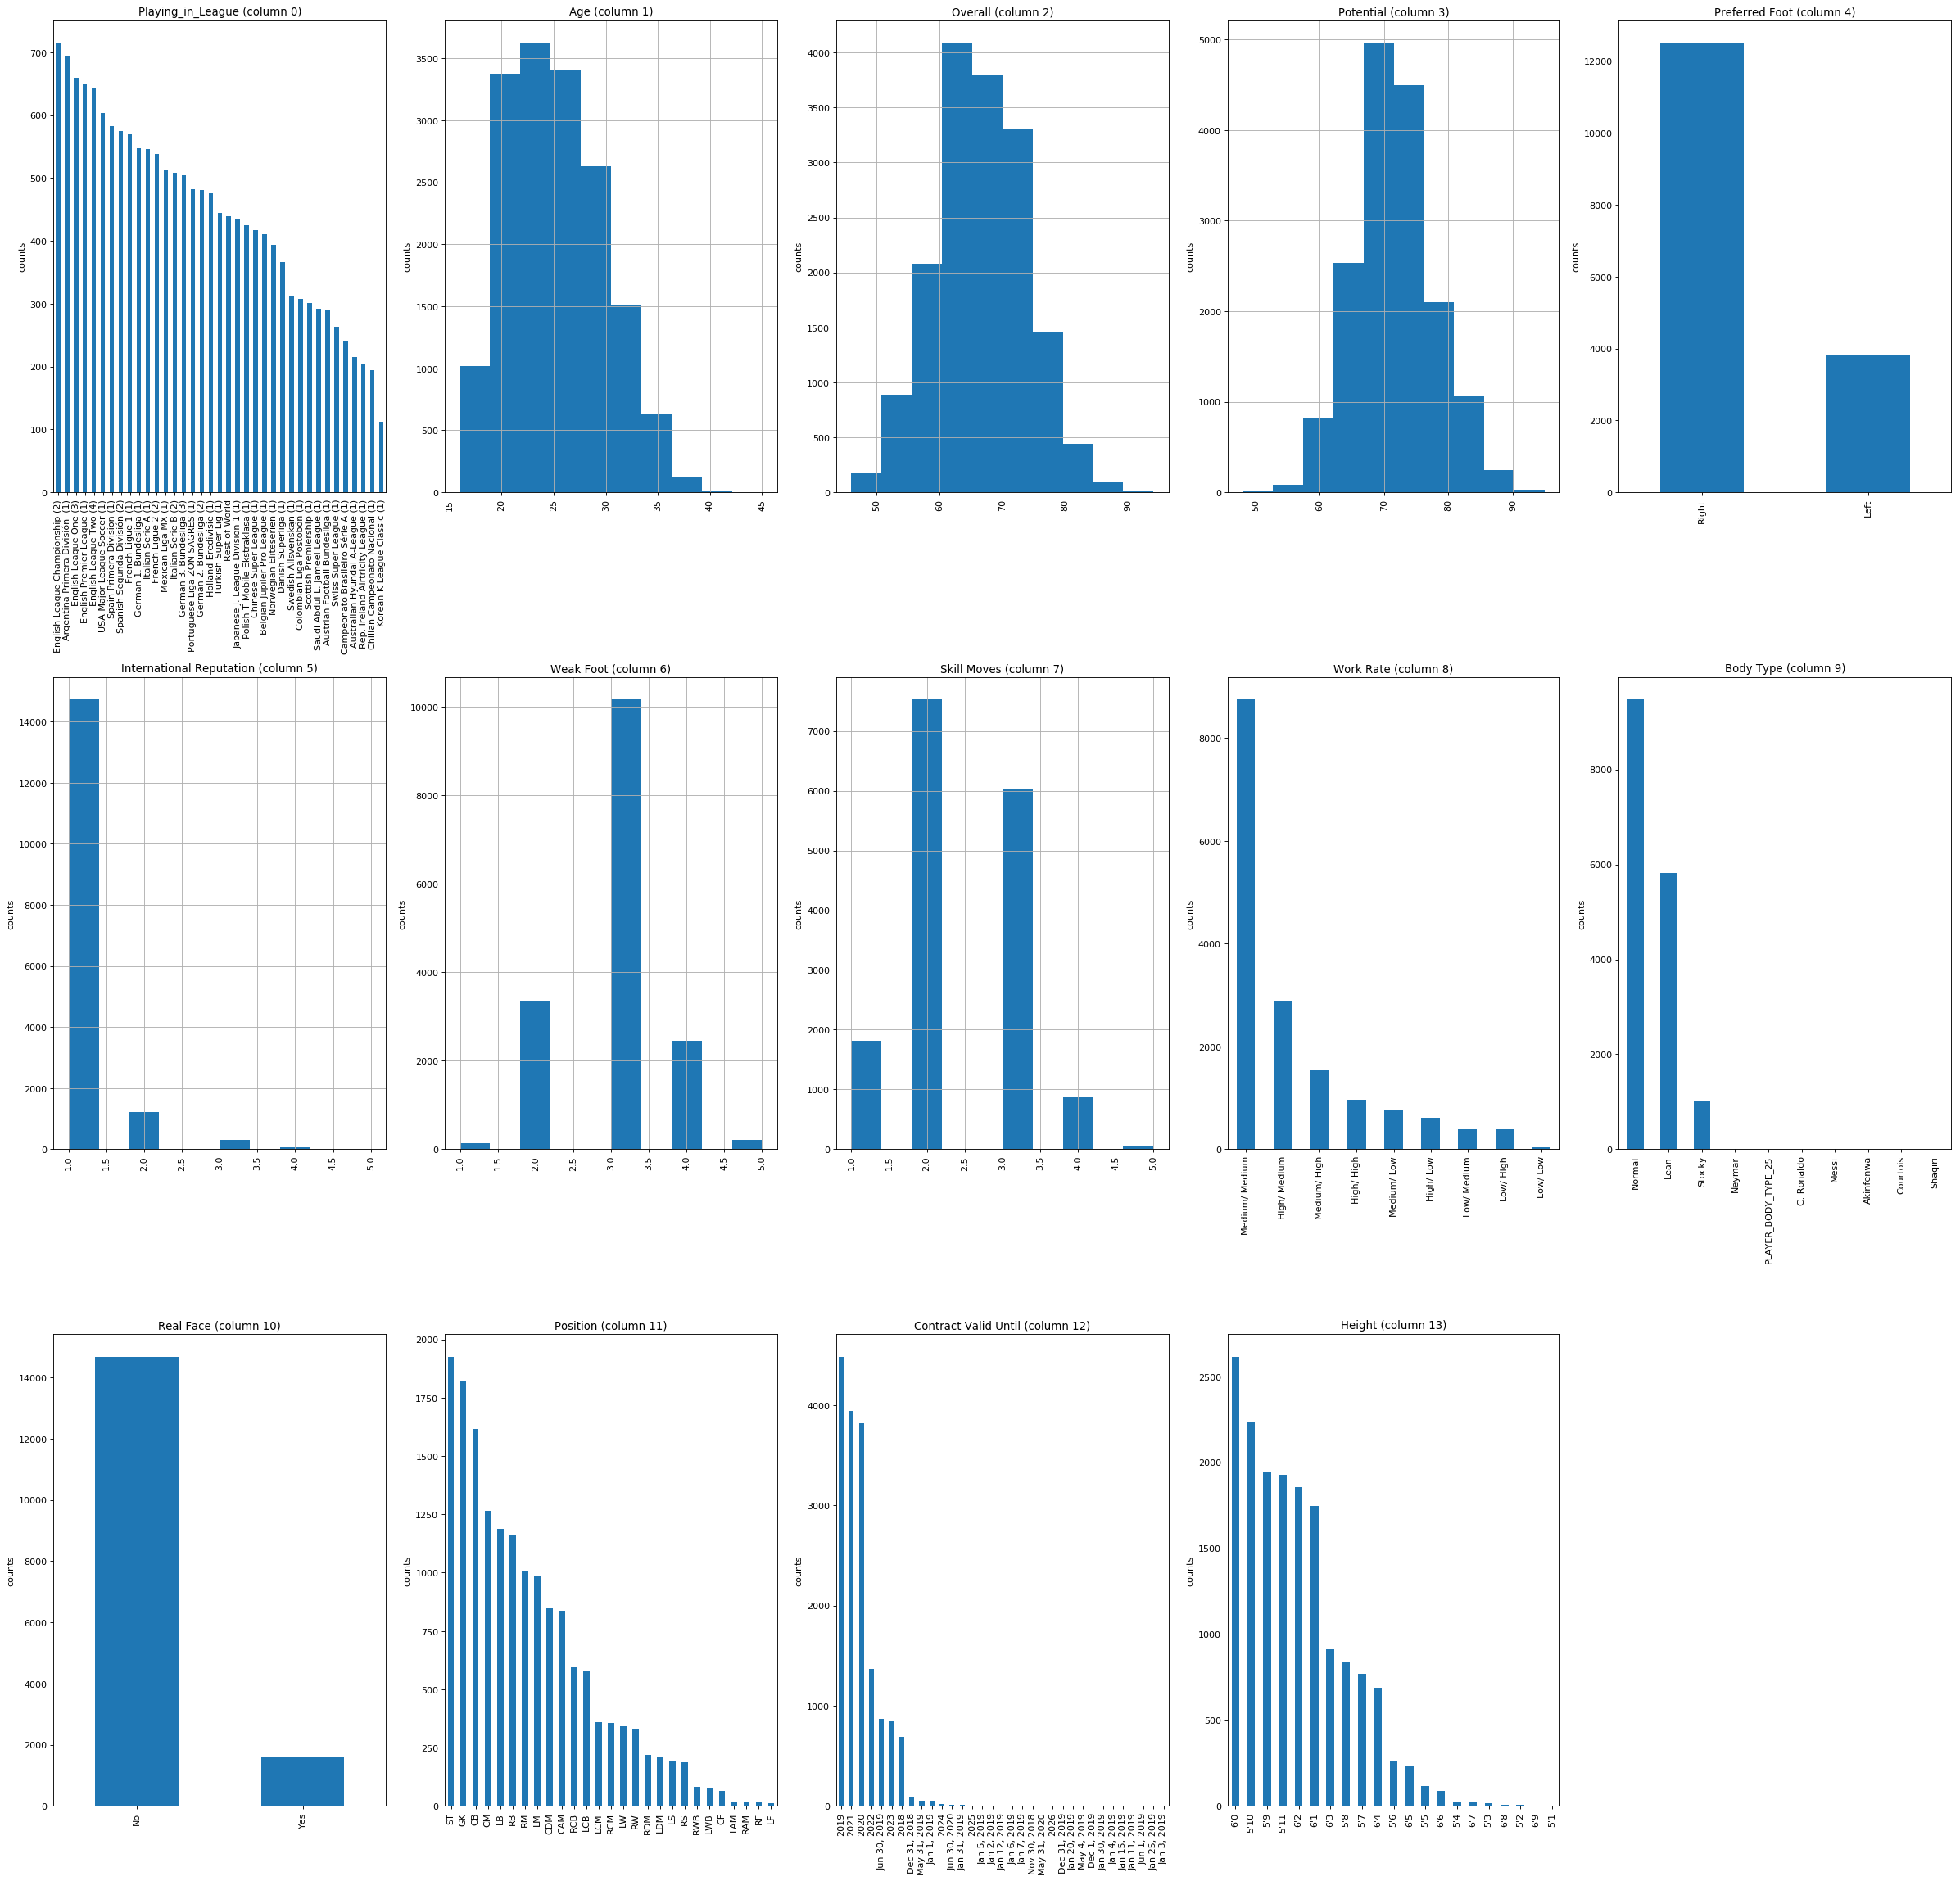

In [8]:
plotPerColumnDistribution(df1, 20, 5)

Correlation matrix:

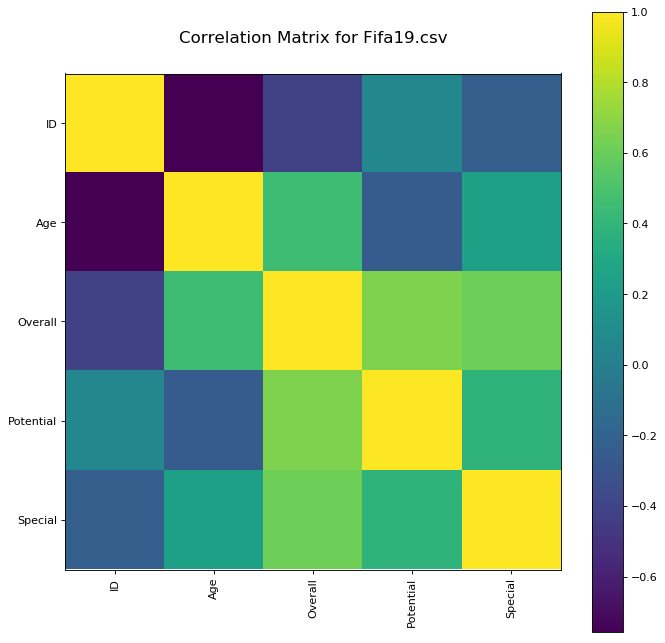

In [9]:
plotCorrelationMatrix(df1, 10)

Scatter and density plots:

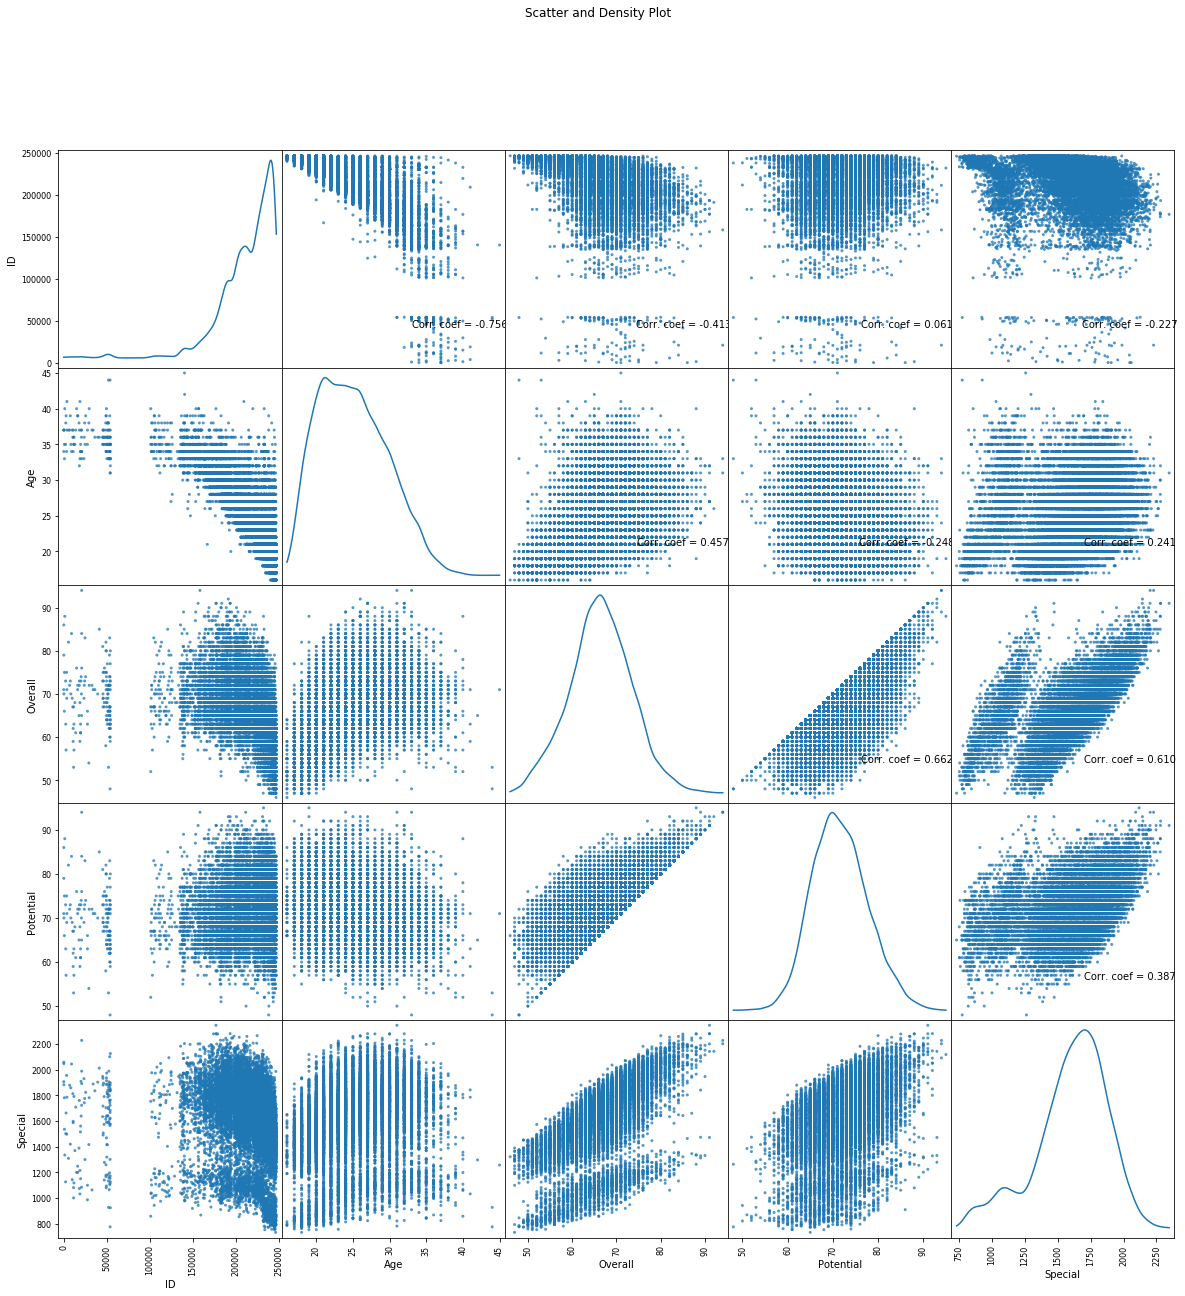

In [10]:
plotScatterMatrix(df1, 20, 10)

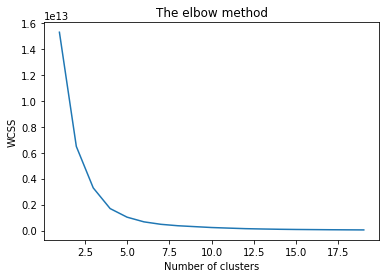

Unsupervised Linear Regression
Confusion Matrix:


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[1430    0  340    0]
 [   0   39    0   15]
 [ 122    0 2744    0]
 [ 512    0    1  178]]
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      1770
           1       1.00      0.72      0.84        54
           2       0.89      0.96      0.92      2866
           3       0.92      0.26      0.40       691

    accuracy                           0.82      5381
   macro avg       0.88      0.69      0.73      5381
weighted avg       0.83      0.82      0.80      5381

Supervised Linear Regression
Confusion Matrix:


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[4850   37    2    0    0]
 [ 326   56    5    0    0]
 [  38   28   21    0    0]
 [   1    7    9    0    0]
 [   0    0    1    0    0]]
              precision    recall  f1-score   support

         1.0       0.93      0.99      0.96      4889
         2.0       0.44      0.14      0.22       387
         3.0       0.55      0.24      0.34        87
         4.0       0.00      0.00      0.00        17
         5.0       0.00      0.00      0.00         1

    accuracy                           0.92      5381
   macro avg       0.38      0.28      0.30      5381
weighted avg       0.89      0.92      0.89      5381

Unsupervised Naive Bayes
Confusion Matrix:
[[1536  102  107   64]
 [   0   48    0    4]
 [ 417   31 2346    8]
 [ 177  106    0  435]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78      1809
           1       0.17      0.92      0.28        52
           2       0.96      0.84      0.89      2802
           3     

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[1807    0    0    1]
 [   0   27    0   31]
 [   0    0 2803    0]
 [   6    3    0  703]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1808
           1       0.90      0.47      0.61        58
           2       1.00      1.00      1.00      2803
           3       0.96      0.99      0.97       712

    accuracy                           0.99      5381
   macro avg       0.96      0.86      0.90      5381
weighted avg       0.99      0.99      0.99      5381

Supervised Random Forest


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[4824   65    0    0    0]
 [ 223  143   21    0    0]
 [  11   39   37    0    0]
 [   0    3   12    2    0]
 [   0    0    1    0    0]]
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97      4889
         2.0       0.57      0.37      0.45       387
         3.0       0.52      0.43      0.47        87
         4.0       1.00      0.12      0.21        17
         5.0       0.00      0.00      0.00         1

    accuracy                           0.93      5381
   macro avg       0.61      0.38      0.42      5381
weighted avg       0.92      0.93      0.92      5381



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of

(10923, 41) (2690, 41) (2691, 41) (10923,) (2690,) (2691,)
Supervised CNN
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2688      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 7,179
Trainable params: 7,179
Non-trainable params: 0
_________________________________________________________________


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:159: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 10923 samples, validate on 2690 samples
Epoch 1/30
10923/10923 [==============================] - 3s 263us/step - loss: 0.6251 - acc: 0.8716 - val_loss: 0.5639 - val_acc: 0.9019
Epoch 2/30
10923/10923 [==============================] - 0s 33us/step - loss: 0.5145 - acc: 0.9030 - val_loss: 0.4693 - val_acc: 0.9019
Epoch 3/30
10923/10923 [==============================] - 0s 34us/step - loss: 0.4258 - acc: 0.9030 - val_loss: 0.3874 - val_acc: 0.9019
Epoch 4/30
10923/10923 [==============================] - 0s 31us/step - loss: 0.3478 - acc: 0.9030 - val_loss: 0.3150 - val_acc: 0.9019
Epoch 5/30
10923/10923 [==============================] - 0s 32us/step - loss: 0.2786 - acc: 0.9030 - val_loss: 0.2505 - val_acc: 0.9019
Epoch 6/30
10923/10923 [==============================] - 0s 33us/step - loss: 0.2167 - acc: 0.9030 - val_loss: 0.1928 - val_acc: 0.9019
Epoch 7/30
10923/10923 [==============================] - 0s 31us/step - loss: 0.1612 - acc: 0.9030 - val_loss: 0.1407 - val_acc

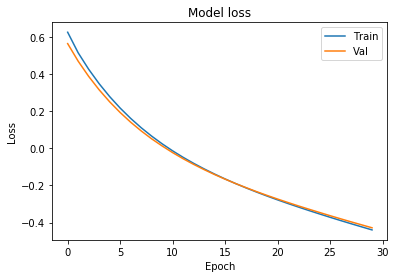

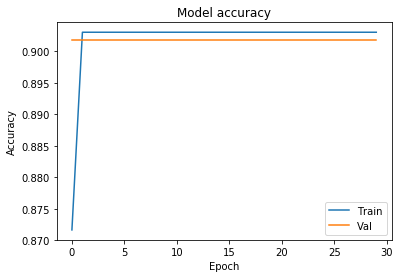

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         1.0       0.90      1.00      0.95      2429
         2.0       0.00      0.00      0.00       206
         3.0       0.00      0.00      0.00        48
         4.0       0.00      0.00      0.00         8

    accuracy                           0.90      2691
   macro avg       0.23      0.25      0.24      2691
weighted avg       0.81      0.90      0.86      2691

Regularized CNN(Supervised)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                2688      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2

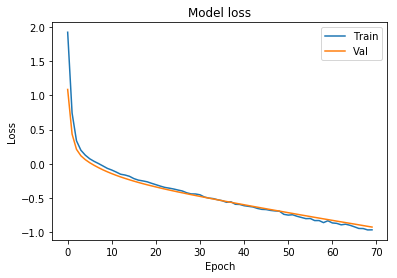

2691/2691 [==============================] - 0s 53us/step
Testing accuracy: 0.9026384243997044


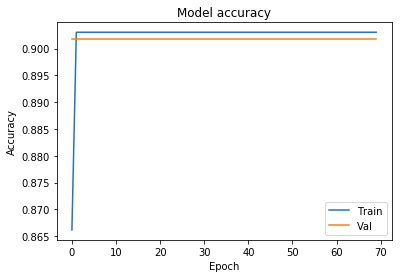

              precision    recall  f1-score   support

         1.0       0.90      1.00      0.95      2429
         2.0       0.00      0.00      0.00       206
         3.0       0.00      0.00      0.00        48
         4.0       0.00      0.00      0.00         8

    accuracy                           0.90      2691
   macro avg       0.23      0.25      0.24      2691
weighted avg       0.81      0.90      0.86      2691



'\nprint("SVM")\nprint("Confusion Matrix:")\n\nfrom sklearn.svm import SVC\nsvclassifier = SVC(kernel=\'linear\')\nsvclassifier.fit(train_x2, train_y2)\ny_pred = svclassifier.predict(valid_x2)\nfrom sklearn.metrics import classification_report, confusion_matrix\nprint(confusion_matrix(valid_y2,y_pred))\nprint(classification_report(valid_y2,y_pred))\n\n'

In [11]:

import math
def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
#df1 = df.loc[:, ['date', 'CPIAUCSL']]
df2=df1.loc[:,['ID','Age','Overall','Potential','Special','Weak Foot','International Reputation','Skill Moves','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'
]]
cols = list(df2.columns.values)
df2 = df2.dropna('rows')
#print(len(df2))



dff1=change_column_order(df2,'International Reputation',42)


dffy=dff1['International Reputation']
dffx=dff1.iloc[:,:41]
#print(dffx)



#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

x = dffx.iloc[:, :].values

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
f1 = plt.figure()
plt.plot(range(1, 20), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
#print(y_kmeans)
#print(len(y_kmeans))
dffcopy=dffx.copy()
dffcopy['kmeans']=y_kmeans
#dffxcopy.join(pd.DataFrame(y_kmeans))


dffycopy=dffcopy['kmeans']
dffxcopy=dffcopy.iloc[:,:41]

print("Unsupervised Linear Regression")

train_x2copy, valid_x2copy, train_y2copy, valid_y2copy = model_selection.train_test_split(dffxcopy, dffycopy,test_size=0.33)
print("Confusion Matrix:")
model1 = LogisticRegression()
model1 = model1.fit(train_x2copy, train_y2copy)
pred = model1.predict(valid_x2copy)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(valid_y2copy,pred))
print(classification_report(valid_y2copy,pred))



print("Supervised Linear Regression")

train_x2, valid_x2, train_y2, valid_y2 = model_selection.train_test_split(dffx, dffy,test_size=0.33)
print("Confusion Matrix:")
model1 = LogisticRegression()
model1 = model1.fit(train_x2, train_y2)
pred = model1.predict(valid_x2)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(valid_y2,pred))
print(classification_report(valid_y2,pred))

print("Unsupervised Naive Bayes")

train_x2copy, valid_x2copy, train_y2copy, valid_y2copy = model_selection.train_test_split(dffxcopy, dffycopy,test_size=0.33)
print("Confusion Matrix:")
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred = gnb.fit(train_x2copy, train_y2copy).predict(valid_x2copy)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(valid_y2copy,pred))
print(classification_report(valid_y2copy,pred))


print("Supervised NaiveBayes")
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(train_x2, train_y2).predict(valid_x2)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(valid_y2,y_pred))
print(classification_report(valid_y2,y_pred))

print("Unsupervised Random Forest")
train_x2copy, valid_x2copy, train_y2copy, valid_y2copy = model_selection.train_test_split(dffxcopy, dffycopy,test_size=0.33)
print("Confusion Matrix:")
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
y_pred = rfc.fit(train_x2copy, train_y2copy).predict(valid_x2copy)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(valid_y2copy,y_pred))
print(classification_report(valid_y2copy,y_pred))

print("Supervised Random Forest")
from sklearn import model_selection
# random forest model creation
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
y_pred = rfc.fit(train_x2, train_y2).predict(valid_x2)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(valid_y2,y_pred))
print(classification_report(valid_y2,y_pred))






from sklearn import preprocessing
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Activation


X_train, X_val_and_test, Y_train, Y_val_and_test = model_selection.train_test_split(dffx, dffy, test_size=0.33)
X_val, X_test, Y_val, Y_test =  model_selection.train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

print("Supervised CNN")

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, init = 'uniform', activation = 'relu', input_dim = 41))
# Adding the second hidden layer
model.add(Dense(64, init = 'uniform', activation = 'relu'))
# Adding the output layer
model.add(Dense(5, activation='softmax'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
hist=model.fit(X_train, Y_train, validation_data=(X_val, Y_val), nb_epoch=30, batch_size=128)

print("Testing accuracy:",model.evaluate(X_test, Y_test)[1])



import matplotlib.pyplot as plt
f1 = plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
import matplotlib.pyplot as plt
f1 = plt.figure()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

pred= (model.predict(X_test))
predint=np.ceil(pred)
yint=np.ceil(Y_test)

print(classification_report(yint,predint))
print("Regularized CNN(Supervised)")

from keras.layers import Dropout
from keras import regularizers
model_3 = Sequential([Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(41,)), Dropout(0.3),Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3), Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3), Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3),(Dense(5, activation='softmax')),Dropout(0.3), Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),])
model_3.compile(optimizer='adam',  loss='binary_crossentropy',  metrics=['accuracy'])
model_3.summary()
hist_3 = model_3.fit(X_train, Y_train, batch_size=128, epochs=70,  validation_data=(X_val, Y_val))
print("New Testing accuracy:",model_3.evaluate(X_test, Y_test)[1])
import matplotlib.pyplot as plt
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
print("Testing accuracy:",model_3.evaluate(X_test, Y_test)[1])

import matplotlib.pyplot as plt
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

pred= (model_3.predict(X_test))
predint=np.ceil(pred)
yint=np.ceil(Y_test)

print(classification_report(yint,predint))



'''
print("SVM")
print("Confusion Matrix:")

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_x2, train_y2)
y_pred = svclassifier.predict(valid_x2)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(valid_y2,y_pred))
print(classification_report(valid_y2,y_pred))




#score = np.sqrt(mean_squared_error(Y_test,pred))
#print(score)



#model = Sequential([Dense(64, activation='relu', input_shape=(41,)),Dense(64, activation='relu'), Dense(1, activation='sigmoid'),])

#model.compile(optimizer='sgd',  loss='binary_crossentropy', metrics=['accuracy'])

#hist = model.fit(X_train, Y_train, batch_size=10, epochs=50, validation_data=(X_val, Y_val))

#print("Testing accuracy:",model.evaluate(X_test, Y_test)[1])

import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

As you can see, the training set has 11412 data points while the validation and test set has 2446 data points each. 
The X variables have 41 input features, while the Y variables only has one feature to predict.
Hidden layer 1: 32 neurons, ReLU activation
Hidden layer 2: 32 neurons, ReLU activation
Output Layer: 1 neuron, Sigmoid activation

model = Sequential([ ... ])

This says that we will store our model in the variable ‘model’, and we’ll describe it sequentially (layer by layer) in between the square brackets.

Dense(32, activation='relu', input_shape=(10,)),

We have our first layer as a dense layer with 32 neurons, ReLU activation and the input shape is 10 since we have 10 input features. Note that ‘Dense’ refers to a fully-connected layer, which is what we will be using.

Dense(32, activation='relu'),

Our second layer is also a dense layer with 32 neurons, ReLU activation. Note that we do not have to describe the input shape since Keras can infer from the output of our first layer.

Dense(1, activation='sigmoid'),

Our third layer is a dense layer with 1 neuron, sigmoid activation.

And just like that, we have written our model architecture (template) in code!
We put the following settings inside the brackets after model.compile:

optimizer='sgd'

‘sgd’ refers to stochastic gradient descent (over here, it refers to mini-batch gradient descent), which we’ve seen in Intuitive Deep Learning Part 1b.

loss='binary_crossentropy'

The loss function for outputs that take the values 1 or 0 is called binary cross entropy.

metrics=['accuracy']

Lastly, we want to track accuracy on top of the loss function. Now once we’ve run that cell, we are ready to train!

'''

'''
print("SVM")
print("Confusion Matrix:")

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_x2, train_y2)
y_pred = svclassifier.predict(valid_x2)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(valid_y2,y_pred))
print(classification_report(valid_y2,y_pred))

'''